# <center><u><b> Let's make a New Dataframe :</b></u></center>
# <center><u><b>Data Exploration and DataFrame Extraction with Regex </b></u></center>



<div style="text-align:center">
    <img src="https://st2.depositphotos.com/4191945/7462/v/450/depositphotos_74627113-stock-illustration-document-funnel-or-filter-logo.jpg" alt="Filter Logo">
</div>

**We will propose creating a dataframe by extracting features with Regex.**

## <u>Table of Contents</u>

#### &rarr; [1.Introduction](#introduction)
- [1.1.Objectives](#oap)
- [1.2.Where do the data come from?](#wdf)
- [1.3.Description of Variables](#wdf2)


#### &rarr; [2.New Dataframe](#dpp)
- [2.1.Description of New Variables](#df)
- [2.2.The New Dataframe](#df2)


#### &rarr; [3.Data extraction](#eda)
- [3.1.Dataframe overview](#eda1)
- [3.2.Price cleaning](#eda2)
- [3.3.Features extraction from "name](#eda3)


    - 3.3.1. Brand cleaning
    
    
    - 3.3.2. Color cleaning
    
    
    - 3.3.3. Storage cleaning
    
    

#### &rarr; [4.Feature Extraction from the Corpus](#ce)
- [4.1.Corpus WordCloud](#ce1)
- [4.2.System extraction](#ce2)
- [4.3.Processor Type extraction](#ce3)
- [4.4.Resolution extraction](#ce4)
- [4.5.Size extraction](#ce5)


#### &rarr; [5.Save New Dataframe](#snd)

#### &rarr; [6.Conclusion & Infos](#c&a)

## <u>1.Introduction<a id="introduction"></a></u>

### <u>1.1.Objectives and Problem Statement<a id="oap"></u>

#### <u>Objectives</u>

Smartphones have become an essential part of our daily lives, offering a multitude of features that go far beyond simple phone calls. These versatile devices are true technological marvels, providing communication capabilities, internet browsing, entertainment, photography, and much more. With fierce competition in the market, smartphone manufacturers strive to offer the best features and performance to cater to the diverse needs and preferences of users.

Smartphone Characteristics:

Smartphones come with a range of technical features that determine their performance and functionalities. Some key characteristics include the processor, RAM, storage space, screen resolution, camera quality, battery capacity, wireless connectivity like Wi-Fi and Bluetooth, and many others. These features vary significantly from one model to another, allowing consumers to choose a smartphone that suits their specific requirements.

Using Characteristics for Prediction:

Smartphone features can also be used in more advanced applications, such as predicting the phone's quality or even its price. By employing machine learning techniques, it is possible to create models that analyze the technical features of smartphones and predict their overall performance or market value.

The objective of this study is to explore a smartphone dataset containing various technical characteristics such as processor, RAM, storage capacity, screen resolution, etc. By using regular expressions (Regex) and data processing techniques, we will aim to extract and prepare these features to create an enriched new DataFrame. This DataFrame can then be used to train machine learning models to predict the overall rating or price of smartphones based on their technical characteristics.

By achieving these objectives, we hope to gain a better understanding of how smartphone features can influence their overall performance and value, while also developing skills in data processing and machine learning for practical use in data analysis and machine learning applications.

### <u>1.2.Where do the data come from?<a id="wdf"></u>
    
Welcome to the Mobile Recommendation System Dataset a comprehensive collection of all smartphones providing valuable insights into all mobile phones categories cutting-edge range of mobile devices. This dataset is a result of meticulous web scraping from trusted source Flipkart.
The data is available on Kaggle : [Mobile Recommendation System Dataset](https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset)

### <u>1.3.Description of Variables<a id="wdf2"></u>


<code>name</code> - Names of various Samsung smartphone models, showcasing the diversity and variety of offerings. 
    
    
<code>ratings</code> - User ratings and reviews associated with each model, reflecting customer satisfaction and feedback.
    
    
<code>price</code> - Prices of the Samsung mobiles, helping users understand the affordability and value proposition of each device.
    
    
<code>corpus</code> - where there is complete information of storage_ram, camera, oS_Processor, display, network and battery.  
    

## <u>2.New Dataframe<a id="dpp"></a></u>

**We directly provide the final result below.  
Other features could have been extracted, but the changing quality of the corpus and its readability led us to focus on the most represented characteristics.**  


**Feel free to save this dataframe for your own projects.** 


### <u>2.1.Description of New Variables<a id="df"></a></u>

  
   

<code>ratings</code> -The average rating given by users (numeric: between 2.9 and 5 ) 
    
    
<code>price</code> - The price of the phone in India (in dollars) (numeric: between 100 and 1094)  
    
    
<code>corpus</code> - This contains complete information of storage_ram, camera, oS_Processor, display, network and battery. (text)  
    
    
<code>brand</code> - The brand of the phone (nominal: 'samsung', 'redmi', 'vivo', 'oppo', 'oneplus', 'realme', 'infinix', 'tecno', 'motorola', 'mi', 'xiaomi')  
    
    
<code>mobile_name</code> - The name and version of the phone size (text)
    
    
<code>color</code> - The color of the phone (nominal: 'black', 'blue', 'green', 'white', 'grey', 'gold, 'silver', 'purple') 
    
    
<code>system</code> - The os of the phone (binary: 'android' - 'ios') 
    
    
<code>processor_type</code> - The type of processor of the phone (nominal: 'mediatek', 'qualcomm', 'intel', 'samsung')  
    
    
<code>resolution</code> - The resolution of the phone (ordinal: 'HD', 'Full HD', '2K', '4K')
    
    
<code>size</code> - The phone's size in inches (numeric: between 1.8 and 7.6)  
    
    
<code>storage</code> - The storage capacity of the phone in GB (numeric: between 32 and 256)  

### <u>2.2.The New Dataframe<a id="df2"></a></u>


<details>
<summary><b>Click to toggle code</b></summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

dataframe = pd.read('data/mobile_characteristics.csv')
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

dataframe = pd.read_csv('data/mobile_characteristics.csv')
dataframe.head(3)

,ratings,price,imgURL,corpus,brand,mobile_name,color,storage,system,processor_type,resolution,size
0,4.2,291,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram6 systemandroid 12processor t...,redmi,Note 12 Pro 5G,black,128,android,mediatek,Full HD,6.7
1,4.5,255,https://rukminim2.flixcart.com/image/312/312/k...,storage128 gbram6 gbexpandable storage256gb s...,oppo,F11 Pro,green,128,android,mediatek,Full HD,6.5
2,4.2,159,https://rukminim2.flixcart.com/image/312/312/x...,storage64 gbram4 systemandroid 11processor sp...,redmi,Note 11,white,64,android,intel,Full HD,6.4


## <u>3.Data extraction<a id="eda"></a></u>

### <u>3.1.Dataframe overview<a id="eda1"></a></u>

<details>
<summary><b>Click to toggle code</b></summary>

```python
df = pd.read_csv('data/mobile.csv')
df.head(2)
```

In [2]:
df = pd.read_csv('data/mobile.csv')
df.head(2)

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


In [4]:
df.isnull().sum()

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64

**We drop nan lines**


<details>
<summary><b>Click to toggle code</b></summary>

```python
df = df.dropna()
df.isnull().sum()
```

In [5]:
df = df.dropna()
df.isnull().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [6]:
df.shape

(2534, 5)

### <u>3.2.Price cleaning<a id="eda2"></a></u>

We clean Price column to keep number then we apply a dollar conversion

Number extraction function :

<details>
<summary><b>Click to toggle code</b></summary>

```python
def extract_numbers(text):
    # Use a regular expression to extract numbers (\d+)
    numbers = re.findall(r'\d+', text)
    # Join the numbers to obtain a single string
    cleaned_text = ''.join(numbers)
    return cleaned_text
```

In [7]:
def extract_numbers(text):
    # Use a regular expression to extract numbers (\d+)
    numbers = re.findall(r'\d+', text)
    # Join the numbers to obtain a single string
    cleaned_text = ''.join(numbers)
    return cleaned_text

Dollar converter :

<details>
<summary><b>Click to toggle code</b></summary>

```python
def convert_inr_to_usd(amount_in_inr, exchange_rate_inr_to_usd):
    """
    Converts an amount in Indian Rupees (INR) to US Dollars (USD) using the given exchange rate.

    :param amount_in_inr: Amount in Indian Rupees (INR) to be converted to US Dollars (USD).
    :type amount_in_inr: float
    :param exchange_rate_inr_to_usd: Exchange rate from Indian Rupees (INR) to US Dollars (USD).
    :type exchange_rate_inr_to_usd: float
    :return: Equivalent amount in US Dollars (USD).
    :rtype: float
    """
    amount_in_usd = amount_in_inr / exchange_rate_inr_to_usd
    return amount_in_usd
```

In [8]:
def convert_inr_to_usd(amount_in_inr, exchange_rate_inr_to_usd):
    """
    Converts an amount in Indian Rupees (INR) to US Dollars (USD) using the given exchange rate.

    :param amount_in_inr: Amount in Indian Rupees (INR) to be converted to US Dollars (USD).
    :type amount_in_inr: float
    :param exchange_rate_inr_to_usd: Exchange rate from Indian Rupees (INR) to US Dollars (USD).
    :type exchange_rate_inr_to_usd: float
    :return: Equivalent amount in US Dollars (USD).
    :rtype: float
    """
    amount_in_usd = amount_in_inr / exchange_rate_inr_to_usd
    return amount_in_usd

We apply extract_number on Price column :

In [9]:
df['price'] = df['price'].apply(extract_numbers).astype(int)

Then we apply the dollar converter :

In [10]:
exchange_rate_inr_to_usd = 82.26

# Apply the conversion function to the "price" column
df['price'] = df['price'].apply(convert_inr_to_usd, exchange_rate_inr_to_usd=exchange_rate_inr_to_usd).astype(int)

We delete prices < 100 dollar : 

In [11]:
# Create a mask to select rows where 'price' is less than 100
mask = df['price'] < 100

# Use the .loc method to select the rows to be deleted, then delete them
df.drop(df.loc[mask].index, inplace=True)

In [12]:
df.head(2)

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,291,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,255,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...


### <u>3.3.Features extraction from "name<a id="eda3"></a></u>

We will extract various features from the 'name' variable using Regex.


extract_infos function :


<details>
<summary><b>Click to toggle code</b></summary>

```python
def extract_infos(text):
    # Regular expression pattern to capture different parts of the example
    pattern = r'^(.*?)\s+(.*?)\s+\((.*?),\s+(.*?)\)$'
    match = re.match(pattern, text)

    if match:
        brand = match.group(1)
        mobile_name = match.group(2)
        color = match.group(3)
        storage = match.group(4)

        # Replace empty values with None
        if not color:
            color = None
        if not storage:
            storage = None

        return pd.Series({
            'brand': brand,
            'mobile_name': mobile_name,
            'color': color,
            'storage': storage
        })
    else:
        return pd.Series({
            'brand': None,
            'mobile_name': None,
            'color': None,
            'storage': None
        })
```

In [13]:
def extract_infos(text):
    # Regular expression pattern to capture different parts of the example
    pattern = r'^(.*?)\s+(.*?)\s+\((.*?),\s+(.*?)\)$'
    match = re.match(pattern, text)

    if match:
        brand = match.group(1)
        mobile_name = match.group(2)
        color = match.group(3)
        storage = match.group(4)

        # Replace empty values with None
        if not color:
            color = None
        if not storage:
            storage = None

        return pd.Series({
            'brand': brand,
            'mobile_name': mobile_name,
            'color': color,
            'storage': storage
        })
    else:
        return pd.Series({
            'brand': None,
            'mobile_name': None,
            'color': None,
            'storage': None
        })

We apply the function on our df :

<details>
<summary><b>Click to toggle code</b></summary>

```python
# Apply the separation function to the 'name' column
data = df['name'].apply(extract_infos)

# Concatenate the result with the original DataFrame
data = pd.concat([df, data], axis=1)

# Remove the 'name' column that contains the original unseparated text
data.drop(columns=['name'], inplace=True)
```

In [14]:
# Apply the separation function to the 'name' column
data = df['name'].apply(extract_infos)

# Concatenate the result with the original DataFrame
data = pd.concat([df, data], axis=1)

# Remove the 'name' column that contains the original unseparated text
data.drop(columns=['name'], inplace=True)

In [15]:
data.head(2)

,ratings,price,imgURL,corpus,brand,mobile_name,color,storage
0,4.2,291,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,REDMI,Note 12 Pro 5G,Onyx Black,128 GB
1,4.5,255,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,OPPO,F11 Pro,Aurora Green,128 GB


##### &rarr; 3.3.1. Brand cleaning :

Checking occurences

In [16]:
data['brand'].value_counts()

SAMSUNG     401
vivo        264
APPLE       264
OPPO        244
realme      167
REDMI       166
OnePlus     162
Infinix     113
Redmi       112
Tecno       110
MOTOROLA     73
Mi           46
Xiaomi       40
Apple        26
Moto          9
13            2
10T           1
Motorola      1
11            1
MI            1
Note          1
Name: brand, dtype: int64

String lowercase :

<details>
<summary><b>Click to toggle code</b></summary>

```python
data['brand'] = data['brand'].str.lower()
```

In [17]:
data['brand'] = data['brand'].str.lower()

Delete useless data and replace 'moto' :

<details>
<summary><b>Click to toggle code</b></summary>

```python
mask = data['brand'].isin(['13', '10t', '11', 'note'])
idx_brand = data.index[mask]
data.drop(index=idx_brand, inplace=True)

data['brand'] = data['brand'].replace('moto','motorola')
```

In [18]:
mask = data['brand'].isin(['13', '10t', '11', 'note'])
idx_brand = data.index[mask]
data.drop(index=idx_brand, inplace=True)

data['brand'] = data['brand'].replace('moto','motorola')

Checking :

<details>
<summary><b>Click to toggle code</b></summary>

```python
data['brand'].value_counts()
```

In [19]:
data['brand'].value_counts()

samsung     401
apple       290
redmi       278
vivo        264
oppo        244
realme      167
oneplus     162
infinix     113
tecno       110
motorola     83
mi           47
xiaomi       40
Name: brand, dtype: int64

##### &rarr; 3.3.2. Color cleaning :

Checking occurences:

In [20]:
data['color'].value_counts()

Black            112
Blue              70
Gold              63
Silver            51
White             36
                ... 
Memphis Green      1
PAC-MAN            1
SEA BLUE           1
Ocean Wave         1
Meta Green         1
Name: color, Length: 671, dtype: int64

String lowercase :

<details>
<summary><b>Click to toggle code</b></summary>

```python
data['color'] = data['color'].str.lower()
```

In [21]:
data['color'] = data['color'].str.lower()

Delete nan :

<details>
<summary><b>Click to toggle code</b></summary>

```python
mask2 = data['color'].isnull()
idx_color = data.index[mask2]
data = data.drop(index=idx_color, inplace=True)
```

In [22]:
mask2 = data['color'].isnull()
idx_color = data.index[mask2]
data.drop(index=idx_color, inplace=True)

extract_color function :

<details>
<summary><b>Click to toggle code</b></summary>

```python
def extract_color(data):
    colors = [
        'red', 'blue', 'yellow', 'green', 'black', 'silver', 'gold', 'purple',
        'starlight', 'white', 'cyan', 'violet', 'brown', 'orange', 'pink',
        'grey', 'gray', 'peach'
    ]
    for color in colors:
        if color in data.lower():
            return color

    return data
```

In [23]:
def extract_color(data):
    colors = [
        'red', 'blue', 'yellow', 'green', 'black', 'silver', 'gold', 'purple',
        'starlight', 'white', 'cyan', 'violet', 'brown', 'orange', 'pink',
        'grey', 'gray', 'peach'
    ]
    for color in colors:
        if color in data.lower():
            return color

    return data

We apply the color function + replace some occurences :

<details>
<summary><b>Click to toggle code</b></summary>

```python
data['color'] = data['color'].apply(extract_color)
data['color'] = data['color'].replace('gray', 'grey').replace(
    'cyan', 'blue').replace('violet', 'purple')
```

In [24]:
data['color'] = data['color'].apply(extract_color)
data['color'] = data['color'].replace('gray', 'grey').replace(
    'cyan', 'blue').replace('violet', 'purple')

We drop colors < 80 occurences :

<details>
<summary><b>Click to toggle code</b></summary>

```python
# Calculate the counts of each color in the 'color' column
color_counts = data['color'].value_counts()

# Filter the colors that have more than 80 occurrences
colors_to_keep = color_counts[color_counts > 80].index.tolist()

# Create a mask to filter the rows with the colors to keep
mask = result_df['color'].isin(colors_to_keep)

# Filter the DataFrame to keep only the colors with more than 80 occurrences
result_df_filtered = result_df[mask]
```

In [25]:
# Calculate the counts of each color in the 'color' column
color_counts = data['color'].value_counts()

# Filter the colors that have more than 80 occurrences
colors_to_keep = color_counts[color_counts > 80].index.tolist()

# Create a mask to filter the rows with the colors to keep
mask = data['color'].isin(colors_to_keep)

# Filter the DataFrame to keep only the colors with more than 80 occurrences
data = data[mask]

In [26]:
data['color'].value_counts()

black     526
blue      500
green     173
white     161
gold      142
silver    124
grey      123
purple     86
Name: color, dtype: int64

##### &rarr; 3.3.2. Storage cleaning :

We reuse the function for extracting numbers for our "storage" column.

<details>
<summary><b>Click to toggle code</b></summary>

```python
data['stockage'] = data['stockage'].apply(extract_numbers).astype(int)
```

In [27]:
data['storage'] = data['storage'].apply(extract_numbers).astype(int)

In [28]:
data['storage'].value_counts()

128    787
64     524
256    268
32     158
16      35
512     30
1       15
8       11
6        5
4        2
Name: storage, dtype: int64

We will remove all phones with less than 40 occurrences for their storage: 
    
<details>
<summary><b>Click to toggle code</b></summary>

```python
storage_counts = data['stockage'].value_counts()

# Filtrer les couleurs qui ont plus de 80 occurrences
storage_to_keep = storage_counts[storage_counts > 40].index.tolist()

# Créer un masque pour filtrer les lignes avec les couleurs à garder
mask = data['stockage'].isin(storage_to_keep)

# Filtrer le DataFrame pour ne garder que les couleurs avec plus de 80 occurrences
data = data[mask]
```

In [29]:
storage_counts = data['storage'].value_counts()

# Filtrer les couleurs qui ont plus de 80 occurrences
storage_to_keep = storage_counts[storage_counts > 40].index.tolist()

# Créer un masque pour filtrer les lignes avec les couleurs à garder
mask = data['storage'].isin(storage_to_keep)

# Filtrer le DataFrame pour ne garder que les couleurs avec plus de 80 occurrences
data = data[mask]

In [30]:
dataframe['storage'].value_counts()

128    723
64     459
256    247
32     142
Name: storage, dtype: int64

We reset our index :

<details>
<summary><b>Click to toggle code</b></summary>

```python
data.reset_index(drop=True, inplace=True)
```

In [31]:
data.reset_index(drop=True, inplace=True)


## <u>4.Feature Extraction from the Corpus<a id="ce"></a></u>

We print some corpus from our dataframe :

<details>
<summary><b>Click to toggle code</b></summary>

```python
for index, row in data.sample(4).iterrows():
    print(row['corpus'])
    print('')
    print('')
```

In [32]:
for index, row in data.sample(4).iterrows():
    print(row['corpus'])
    print('')
    print('')

Storage128 GBRAM8 GBExpandable Storage1TB  SystemAndroid 11Processor TypeQualcomm Snapdragon 778GProcessor Speed2.4 64MP 12MP 5MP 5MP 64MP 12MP 5MP 5MP 32MP 5G Capacity4500 Display Size16.51 cm (6.5 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUQualcomm Adreno 642LDisplay TypeFull HD+ Super AMOLED DisplayDisplay Colors16MOther Display Features120Hz Refresh Rate


Storage64 GBRAM3 GBExpandable Storage1TB  SystemAndroid 12Processor TypeMediatek Helio P35Processor Speed2.3 13MP 2MP 13MP 2MP 5MP 5MP 4G Capacity5000 Display Size16.54 cm (6.51 inch)Resolution1600 x 720 PixelResolution TypeHD+GPUIMG PowerVR GE8320Display TypeHD+ LCD (IPS) DisplayOther Display FeaturesRefresh Rate: 60 Hz, Screen-to-Body Ratio: 88.99%, Aspect Ratio: 20:9


Storage64 GBRAM6 GBExpandable Storage512GB  SystemAndroid Pie 10Processor TypeSamsung Exynos 9 Octa 9611Processor Speed2.3 64MP 8MP 5MP 5MP 32MP 4G Capacity6000 Display Size16.26 cm (6.4 inch)Resolution2340 x 1080$$pixelResolution TypeFull HD+GPU

### <u>4.1.Corpus WordCloud<a id="ce1"></a></u>

We will generate a word cloud to try to observe the most recurring occurrences in our corpus :


<details>
<summary><b>Click to toggle code</b></summary>
    
```python
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Text Preprocessing
def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply text preprocessing to the "corpus" column
data['corpus'] = data['corpus'].apply(preprocess_text)

# Step 2: Term Counting
# Combine all corpora into a single text
all_corpus_text = ' '.join(data['corpus'].tolist())
# Split the text into words (tokens)
all_tokens = all_corpus_text.split()
# Count the occurrences of each term (word)
term_counts = Counter(all_tokens)

# Step 3: Word Cloud Creation
# Create a word cloud to visualize the most frequent terms
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 4: Ascending List of Terms with Occurrences
# Sort the term_counts dictionary based on occurrences (in ascending order)
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Display the list of terms with their occurrences (in ascending order)
print("List of terms with their occurrences (in ascending order):")
for term, count in sorted_terms:
    print(f"{term}: {count}")
```

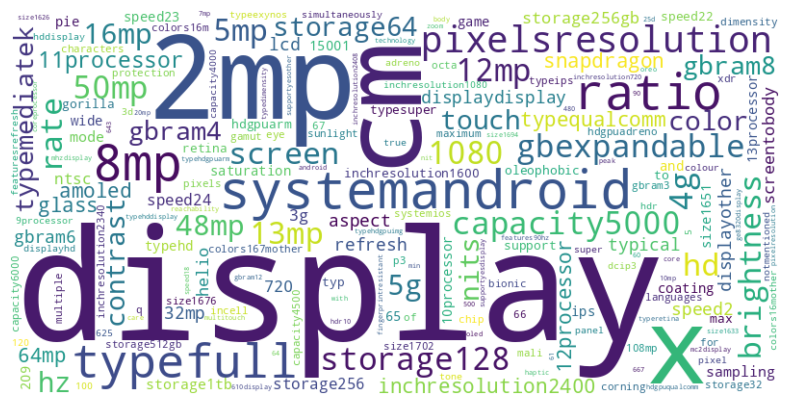

In [33]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 1: Text Preprocessing
def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply text preprocessing to the "corpus" column
data['corpus'] = data['corpus'].apply(preprocess_text)

# Step 2: Term Counting
# Combine all corpora into a single text
all_corpus_text = ' '.join(data['corpus'].tolist())
# Split the text into words (tokens)
all_tokens = all_corpus_text.split()
# Count the occurrences of each term (word)
term_counts = Counter(all_tokens)

# Step 3: Word Cloud Creation
# Create a word cloud to visualize the most frequent terms
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 4: Ascending List of Terms with Occurrences
# Sort the term_counts dictionary based on occurrences (in ascending order)
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Display the list of terms with their occurrences (in ascending order)

# print("List of terms with their occurrences (in ascending order):")
# for term, count in sorted_terms:
#     print(f"{term}: {count}")

**We can see from the word cloud that the information seems to be nested within each other. This will somewhat complicate our processing, but with the help of Regex, it should be achievable.**

### <u>4.2.System Extraction<a id="ce2"></a></u>

We create an extract function using regex :
    
<details>
<summary><b>Click to toggle code</b></summary>
    
```python
def extract_system_string(corpus):
    # Use a regular expression to search for strings containing 'system'
    pattern = r'\b(system\w+)\b'
    system_strings = re.findall(pattern, corpus)

    # Remove the word "system" from each found string
    result_strings = [s.replace('system', '') for s in system_strings]

    # Join the processed strings into a single string separated by a space
    result = ' '.join(result_strings)

    return result
```

In [34]:
def extract_system_string(corpus):
    # Use a regular expression to search for strings containing 'system'
    pattern = r'\b(system\w+)\b'
    system_strings = re.findall(pattern, corpus)

    # Remove the word "system" from each found string
    result_strings = [s.replace('system', '') for s in system_strings]

    # Join the processed strings into a single string separated by a space
    result = ' '.join(result_strings)

    return result

We apply it and and we group similar systems together :

<details>
<summary><b>Click to toggle code</b></summary>
    
```python
# Extract 
data['system'] = data['corpus'].apply(extract_system_string)
 
# Replace
data['system'] = data['system'].replace(
    'androidprocessor',
    'android').replace('hios', 
                       'android').replace('12primary', 'android')
```

In [35]:
data['system'] = data['corpus'].apply(extract_system_string)
 
# Replace
data['system'] = data['system'].replace(
    'androidprocessor',
    'android').replace('hios', 
                       'android').replace('12primary', 'android')

We keep system that have more than 150 occurences :

<details>
<summary><b>Click to toggle code</b></summary>
    
```python
# Calculate the counts of each system in the 'system' column
system_counts = data['system'].value_counts()

# Filter the systems that have more than 150 occurrences
systems_to_keep = system_counts[system_counts > 150].index.tolist()

# Create a mask to filter the rows with the systems to keep
mask = data['system'].isin(systems_to_keep)

# Filter the DataFrame to keep only the systems with more than 150 occurrences
data = data[mask]
```

In [36]:
# Calculate the counts of each system in the 'system' column
system_counts = data['system'].value_counts()

# Filter the systems that have more than 150 occurrences
systems_to_keep = system_counts[system_counts > 150].index.tolist()

# Create a mask to filter the rows with the systems to keep
mask = data['system'].isin(systems_to_keep)

# Filter the DataFrame to keep only the systems with more than 150 occurrences
data = data[mask]

### <u>4.3.Processor Type Extraction<a id="ce3"></a></u>


We create an extract function using regex and applyt it on data :
    
<details>
<summary><b>Click to toggle code</b></summary>
    
```python
def extract_processor_string(corpus):
    # Use a regular expression to search for processors
    pattern = r'type(\w+)'
    processor_match = re.search(pattern, corpus)

    # Retrieve the text found after 'Type'
    result = processor_match.group(1) if processor_match else ''

    return result

# Apply the function to the "corpus" column of the DataFrame
data['processor_type'] = data['corpus'].apply(extract_processor_string)
```

In [37]:
def extract_processor_string(corpus):
    # Use a regular expression to search for processors
    pattern = r'type(\w+)'
    processor_match = re.search(pattern, corpus)

    # Retrieve the text found after 'Type'
    result = processor_match.group(1) if processor_match else ''

    return result

# Apply the function to the "corpus" column of the DataFrame
data['processor_type'] = data['corpus'].apply(extract_processor_string)

We group similar systems together : 
 
 
 <details>
<summary><b>Click to toggle code</b></summary>
    
```python
# Replace the a+[value] with 'apple'
data['processor_type'] = data['processor_type'].replace(r'^a\d+', 'apple', regex=True)

# List of values to replace with 'mediatek'
mediatek_replace = [
    'g37processor', 'helio', 'dimensity', 'mt6763tprocessor', 'mtk',
    'mediateckprocessor', 'meditek', 'mtk6739', 'mt6762'
]
# List of values to replace with 'qualcomm'
qualcomm_replace = ['snapdragon', 'sdm439processor', 'sdm710processor']

# List of values to replace with 'unisoc'
unisoc_replace = ['t612processor']

# List of values to replace with 'samsung'
samsung_replace = ['exynos']

# Replace the values in the 'processor_type' column
data['processor_type'] = data['processor_type'].replace(
    mediatek_replace,
    'mediatek').replace(qualcomm_replace, 'qualcomm').replace(
        unisoc_replace, 'unisoc').replace(samsung_replace, 'samsung')
```

In [38]:
# Replace the a+[value] with 'apple'
data['processor_type'] = data['processor_type'].replace(r'^a\d+', 'apple', regex=True)

# List of values to replace with 'mediatek'
mediatek_replace = [
    'g37processor', 'helio', 'dimensity', 'mt6763tprocessor', 'mtk',
    'mediateckprocessor', 'meditek', 'mtk6739', 'mt6762'
]
# List of values to replace with 'qualcomm'
qualcomm_replace = ['snapdragon', 'sdm439processor', 'sdm710processor']

# List of values to replace with 'unisoc'
unisoc_replace = ['t612processor']

# List of values to replace with 'samsung'
samsung_replace = ['exynos']

# Replace the values in the 'processor_type' column
data['processor_type'] = data['processor_type'].replace(
    mediatek_replace,
    'mediatek').replace(qualcomm_replace, 'qualcomm').replace(
        unisoc_replace, 'unisoc').replace(samsung_replace, 'samsung')

In [39]:
data['processor_type'].value_counts()

mediatek             583
qualcomm             454
                     316
apple                161
samsung              109
unisoc                51
full                  19
octa                  10
20                     7
sec                    6
hdgpuarm               3
hdgpuimagination       2
16                     2
hd                     2
hdgpuadreno            2
2ndgen                 1
hdgpupowervr           1
quad                   1
octacoreprocessor      1
hddisplay              1
hdhd                   1
Name: processor_type, dtype: int64

Our regex has found an empty value, and we will identify and process this variable :

 <details>
<summary><b>Click to toggle code</b></summary>
    
```python
# Count the occurrences of each value in the 'processor_type' column
value_counts_processor_type = data['processor_type'].value_counts()

# Get the third category (at index 2) from the value_counts
value_of_third_category = value_counts_processor_type.index[2]

# Replace the third category with 'intel' in the 'processor_type' column
data['processor_type'] = data['processor_type'].replace(value_of_third_category, 'intel')

```

In [40]:
# Count the occurrences of each value in the 'processor_type' column
value_counts_processor_type = data['processor_type'].value_counts()

# Get the third category (at index 2) from the value_counts
value_of_third_category = value_counts_processor_type.index[2]

# Replace the third category with 'intel' in the 'processor_type' column
data['processor_type'] = data['processor_type'].replace(value_of_third_category, 'intel')


In [41]:
data['processor_type'].value_counts()

mediatek             583
qualcomm             454
intel                316
apple                161
samsung              109
unisoc                51
full                  19
octa                  10
20                     7
sec                    6
hdgpuarm               3
hdgpuimagination       2
16                     2
hd                     2
hdgpuadreno            2
2ndgen                 1
hdgpupowervr           1
quad                   1
octacoreprocessor      1
hddisplay              1
hdhd                   1
Name: processor_type, dtype: int64

We keep system that have more than 70 occurences :

 <details>
<summary><b>Click to toggle code</b></summary>
    
```python
# Count the occurrences of each value in the 'processor_type' column
processor_counts = data['processor_type'].value_counts()

# Filter the processors that have more than 70 occurrences
processors_to_keep = processor_counts[processor_counts > 70].index.tolist()

# Create a mask to filter the rows with the processors to keep
mask = data['processor_type'].isin(processors_to_keep)

# Filter the DataFrame to keep only the processors with more than 70 occurrences
data = data[mask]
```

In [42]:
# Count the occurrences of each value in the 'processor_type' column
processor_counts = data['processor_type'].value_counts()

# Filter the processors that have more than 70 occurrences
processors_to_keep = processor_counts[processor_counts > 70].index.tolist()

# Create a mask to filter the rows with the processors to keep
mask = data['processor_type'].isin(processors_to_keep)

# Filter the DataFrame to keep only the processors with more than 70 occurrences
data = data[mask]

In [43]:
data['processor_type'].value_counts()

mediatek    583
qualcomm    454
intel       316
apple       161
samsung     109
Name: processor_type, dtype: int64

### <u>4.4.Resolution extraction<a id="ce4"></a></u>

We create an extract function using regex and applyt it on data :
    
<details>
<summary><b>Click to toggle code</b></summary>
    
```python    
def extract_resolution(corpus):
    # Use a regular expression to search for the resolution
    pattern = r'resolution(\d+\s*x\s*\d+)'
    resolution_match = re.search(pattern, corpus)

    # Retrieve the resolution found in the corpus
    result = resolution_match.group(1) if resolution_match else ''

    # Remove all non-numeric characters
    result = re.sub(r'\D', '', result)

    # Split the result based on the number of characters
    if len(result) == 7 or len(result) == 8:
        result = result[:4] + ' x ' + result[4:]
    elif len(result) == 6:
        result = result[:3] + ' x ' + result[3:]

    # Keep only the second part of the resolution (after 'x')
    result = result.split('x')[-1].strip()

    return result

    
# Apply the function to the "corpus" column of the DataFrame
data['resolution'] = data['corpus'].apply(extract_resolution)
```

In [44]:
def extract_resolution(corpus):
    # Use a regular expression to search for the resolution
    pattern = r'resolution(\d+\s*x\s*\d+)'
    resolution_match = re.search(pattern, corpus)

    # Retrieve the resolution found in the corpus
    result = resolution_match.group(1) if resolution_match else ''

    # Remove all non-numeric characters
    result = re.sub(r'\D', '', result)

    # Split the result based on the number of characters
    if len(result) == 7 or len(result) == 8:
        result = result[:4] + ' x ' + result[4:]
    elif len(result) == 6:
        result = result[:3] + ' x ' + result[3:]

    # Keep only the second part of the resolution (after 'x')
    result = result.split('x')[-1].strip()

    return result

    
# Apply the function to the "corpus" column of the DataFrame
data['resolution'] = data['corpus'].apply(extract_resolution)

We drop nan value :

<details>
<summary><b>Click to toggle code</b></summary>
    
```python 
# Find the indexes of rows where "resolution" is empty
empty_resolution_index = data[data['resolution'] == ''].index

# Remove the corresponding rows
data.drop(empty_resolution_index, inplace=True)

```

In [45]:
# Find the indexes of rows where "resolution" is empty
empty_resolution_index = data[data['resolution'] == ''].index

# Remove the corresponding rows
data.drop(empty_resolution_index, inplace=True)

We redefine our values into four categories: [Resolution Infos](https://www.phonandroid.com/differences-definition-resolution-ecran.html)

<details>
<summary><b>Click to toggle code</b></summary>
    
```python 
def convert_resolution(resolution_str):
    # Convert the resolution to an integer
    resolution = int(resolution_str)

    # Assign categories based on the resolution
    if resolution < 1080:
        return 'HD'
    elif resolution >= 1080 and resolution < 1440:
        return 'Full HD'
    elif resolution >= 1440 and resolution < 1644:
        return '2K'
    else:
        return '4K'


data['resolution'] = data['resolution'].apply(convert_resolution)
                                                  
```

In [46]:
def convert_resolution(resolution_str):
    # Convert the resolution to an integer
    resolution = int(resolution_str)

    # Assign categories based on the resolution
    if resolution < 1080:
        return 'HD'
    elif resolution >= 1080 and resolution < 1440:
        return 'Full HD'
    elif resolution >= 1440 and resolution < 1644:
        return '2K'
    else:
        return '4K'


data['resolution'] = data['resolution'].apply(convert_resolution)

In [47]:
data['resolution'].value_counts()

Full HD    915
HD         479
4K         152
2K          25
Name: resolution, dtype: int64

### <u>4.5.Size extraction<a id="ce5"></a></u>

We create an extract function using regex and applyt it on data :
    
<details>
<summary><b>Click to toggle code</b></summary>
    
```python
def extract_size_inch(corpus):
    # Use a regular expression to search for the number followed by "inch"
    pattern = r'(\d+)\s*inch'
    inch_match = re.search(pattern, corpus)

    # Retrieve the number found in the corpus
    result = inch_match.group(1) if inch_match else ''

    # Insert a dot after the first character
    if len(result) > 1:
        result = result[:1] + '.' + result[1:]

    return round(float(result), 1) if result else None  # Convert to float


# Apply the function to the "corpus" column of the DataFrame
data['size'] = data['corpus'].apply(extract_size_inch)
```

In [48]:
def extract_size_inch(corpus):
    # Use a regular expression to search for the number followed by "inch"
    pattern = r'(\d+)\s*inch'
    inch_match = re.search(pattern, corpus)

    # Retrieve the number found in the corpus
    result = inch_match.group(1) if inch_match else ''

    # Insert a dot after the first character
    if len(result) > 1:
        result = result[:1] + '.' + result[1:]

    return round(float(result), 1) if result else None  # Convert to float


# Apply the function to the "corpus" column of the DataFrame
data['size'] = data['corpus'].apply(extract_size_inch)

In [49]:
data['size'].value_counts()

6.5    373
6.7    281
6.6    249
6.4    236
6.8     77
6.1     55
6.2     49
5.5     48
6.3     47
4.7     43
6.0     37
7.0     16
5.8     16
5.4     14
5.7      6
6.9      6
7.6      5
5.6      4
5.0      3
5.2      2
1.8      1
4.0      1
5.9      1
Name: size, dtype: int64

## <u>5.Save New Dataframe<a id="snd"></a></u>

We create an extract function using regex and applyt it on data :
    
<details>
<summary><b>Click to toggle code</b></summary>
    
```python
data.to_csv('data/mobile_characteristics.csv', index=False)
```

In [50]:
data.to_csv('data/mobile_characteristics.csv', index=False)

## <u>6.Conclusion & Infos<a id="c&a"></a></u>

##### Conclusion:

In this data analysis project, we explored various features present in the DataFrame to enrich it for machine learning and data analysis purposes. The main objectives were to predict smartphone ratings and prices using these characteristics. Our data preprocessing involved handling missing values, converting currency, and extracting valuable information using regular expressions (Regex). We successfully extracted information from the 'name' column, such as brand, mobile name, color, and storage.

For data exploration, we generated a word cloud to visualize the most frequent terms present in the corpus. This aided us in identifying important patterns and trends in the data. We also categorized the processors into four categories: MediaTek, Qualcomm, Unisoc, and Samsung. Additionally, we converted the resolution values into four categories: HD, Full HD, 2K, and 4K.

Our analysis was focused on resolving issues with missing and redundant data and gaining insights into features that significantly impact smartphone ratings and prices. The project allowed us to identify and process valuable information from the dataset efficiently.

In conclusion, through a thorough exploration and extraction of features with the aid of Regex, we have enriched the DataFrame, and we can now utilize this valuable information for further machine learning and data analysis projects related to smartphone ratings and prices.


##### Infos :

If you desire more information on data preprocessing or Machine Learning techniques, I invite you to visit my GitHub repository: [My_GitHub](https://github.com/CassienBABEY)

You will soon find an Exploratory Data Analysis (EDA) as well as a prediction model based on it.







# Thank you for your attention and consideration !